## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (2,1),
    (2,3)
])

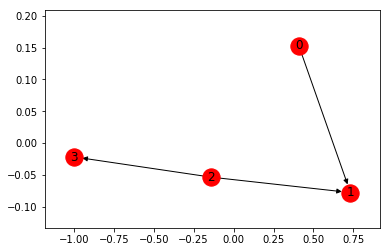

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 0.09200377, -0.48173799,  0.77946844, -0.38973422],
        [-0.73279591,  0.55980626,  0.3459793 , -0.17298965]])

In [8]:
sigma

array([[ 0.26020852, -0.05618332],
       [-0.05618332,  0.49736724]])

In [9]:
eqL

matrix([[ 0.54, -0.42, -0.24,  0.12],
        [-0.42,  0.66, -0.48,  0.24],
        [-0.24, -0.48,  1.44, -0.72],
        [ 0.12,  0.24, -0.72,  0.36]])

In [10]:
posG, negG = separate_graphs(eqL)

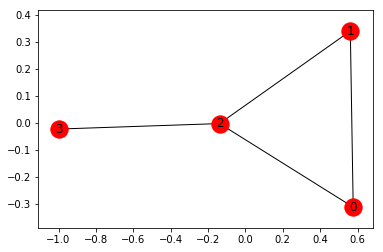

In [12]:
nx.draw_networkx(posG)

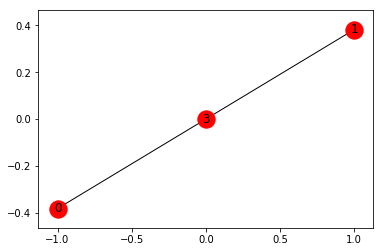

In [13]:
nx.draw_networkx(negG)